# [Python for data analysis] - Diabetes Dataset

## Data Exploration 

### Importation of all the librairies that we will use

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook, show
from bokeh.layouts import gridplot
import pandas_bokeh

#for the machine learning models 
from sklearn.preprocessing import LabelEncoder

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
#we define a permanent style for the plot in order to have an homogenous vizualisation
plt.style.use('default')

### Importation of the dataset

In [4]:
#we create a dataframe by reading a csv file and importing the data
diabetes_df = pd.read_csv(r'../Dataset/diabetic_data.csv', sep =',')
diabetes_df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### First overview

In [5]:
#let's use the info() method in order to observe the structure and the type of the dataframe 
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_




### Counting unknown values

In [6]:
#we replace all the "?" signes by the value NaN
diabetes_df = diabetes_df.replace('?', np.NaN)

In [7]:
# here we count the pourcentage of missing value in the differents columns of this dataframe
missing_values = diabetes_df.isna().sum() / len(diabetes_df)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values = missing_values.to_frame()
missing_values

,0
diag_1,0.000206
diag_2,0.003518
diag_3,0.013983
race,0.022336
payer_code,0.395574
medical_specialty,0.490822
weight,0.968585


### Dropping columns with too much missing values

In [8]:
#with the precedent results, we eliminate the columns that have too many missing values
diabetes_df.drop(columns = ['weight', 'medical_specialty', 'payer_code', 'encounter_id'], inplace = True)

### Dropping redundant rows

In [9]:
 #when we analysed some data in this dataset, we observed that there was redundant rows, some rows
#had the same number of patient value, and sometimes the linked variables were not coherent
#we also drop these rows 
diabetes_df.drop_duplicates(subset = "patient_nbr", keep = 'first', inplace = True)

In [10]:
#because of the dropping of the rows, some index were erased, we need to reset these index
diabetes_df.reset_index(inplace = True, drop = True)
diabetes_df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,183087545,Caucasian,Female,[70-80),1,1,7,9,50,2,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
71514,188574944,Other,Female,[40-50),1,1,7,14,73,6,...,No,Up,No,No,No,No,No,Ch,Yes,>30
71515,140199494,Other,Female,[60-70),1,1,7,2,46,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
71516,120975314,Caucasian,Female,[80-90),1,1,7,5,76,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO


### Setting the patient number as the index

In [11]:
# diabetes_df.set_index('patient_nbr', inplace = True)

### Rethink some colums format

#### Diag_1, Diag_2, Diag_3: mapping ICD9 codes with corresponding names

https://www.hindawi.com/journals/bmri/2014/781670/tab2/

In [12]:
#we create a dictionnary in order to map the value later, this dictionnary correspond to the values found in the link above
map_diag_123 = {'Circulatory' : [x for x in range(390,460)]+[785],
                'Respiratory' : [x for x in range(460,519)]+[786],
                'Digestive' : [x for x in range(520,580)]+[787],
                'Diabetes' : list(set(np.linspace(250, 251, 101)) - set([251])),
                'Injury' : [x for x in range(800,1000)],
                'Musculoskeletal' : [x for x in range(710,440)],
                'Genitourinary' : [x for x in range(580,630)]+[788],
                'Neoplasms' : list(set([x for x in range(1,280)] + [780, 781, 782, 784] + [x for x in range(790, 799)] + [x for x in range(680, 709)] + [x for x in range(290, 320)]) - set([250]))}

In [13]:
#this mapping method replace all the value by their corresponding in order to have traitable data
#the numeric values in the column diag1, diag2, diag3 were too scattered, we had to regroup them by using the informations in the link above
def mapping_df(diabetes_df, column):
    #for the missing value
    if diabetes_df[column] is np.NaN :
        return "No data"
    value = str(diabetes_df[column])
    #there are some value that begin with a character so we treat them first to avoid errors
    if value[0] == "E" : 
        return "Other"
    elif value[0] == "V" : 
        return "Other"
    #we convert the others value to float to have a correct conversion 
    else : value = float(diabetes_df[column])
        
    #now each float value is analysed and in fonction of her category, a string value will be assigned to her
    if value in [x for x in range(390,460)]+[785] : return "Circulatory"
    elif value in [x for x in range(460,519)]+[786] : return "Respiratory"
    elif value in [x for x in range(520,580)]+[787] : return "Digestive"
    elif value in list(set(np.linspace(250, 251, 101)) - set([251])) : return "Diabetes"
    elif value in [x for x in range(800,1000)] : return "Injury"
    elif value in [x for x in range(710,740)] : return "Musculoskeletal"
    elif value in [x for x in range(580,630)]+[788] : return "Genitourinary"
    elif value in list(set([x for x in range(1,280)] + [780, 781, 782, 784] + [x for x in range(790, 799)] + [x for x in range(680, 709)] + [x for x in range(290, 320)]) - set([250])) : return "Neoplasms"
    else : return "Other"

In [14]:
#now we apply the mapping method to the three differents columns
diabetes_df['diag_1'] = diabetes_df.apply(mapping_df, axis = 1, column = 'diag_1')
diabetes_df['diag_2'] = diabetes_df.apply(mapping_df, axis = 1, column = 'diag_2')
diabetes_df['diag_3'] = diabetes_df.apply(mapping_df, axis = 1, column = 'diag_3')

In [15]:
#now we want to create new columns to create new columns to interpret the differents diagnosis of the patient 
# to do so, we first create a method that will give boolean value for the existence of the different diagnosis 
def value_exists(column1, column2, column3, diagnosis):
    value = []
    for i in range(len(column1)):
        if str(column1[i]) == diagnosis or str(column2[i]) == diagnosis or str(column3[i]) == diagnosis:
            #if the correspondant diagnosis is present
            value.append(True)
        else : value.append(False)
    return value

In [16]:
#now we map this value into new columns to interpret later with graphs and learning models
for diag in map_diag_123.keys():
    name = "Diag_" + str(diag)
    diabetes_df[name] = pd.Series(value_exists(diabetes_df['diag_1'], 
                                               diabetes_df['diag_2'], 
                                               diabetes_df['diag_3'], diag))
    

### Rethink some other columns  

In [17]:
#we want to ee what are the actual differents of the columns of this dataset 
diabetes_df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'Diag_Circulatory', 'Diag_Respiratory', 'Diag_Digestive',
       'Diag_Diabetes', 'Diag_Injury', 'Diag_Musculoskeletal',
       'Diag_Genitourinary', 'Di

In [18]:
#we can map another columns to have a better idea of the different admission type in the later graphs
admission_type_id_mapping = {
     1: 'Emergency',
     2:'Urgent',
     3:'Elective',
     4:'Newborn',
     5:'Not Available',
     6:'NULL',
     7:'Trauma Center',
     8 :'Not Mapped'
}

visualisation_df = diabetes_df
visualisation_df.admission_type_id.map(admission_type_id_mapping)

0             NULL
1        Emergency
2        Emergency
3        Emergency
4        Emergency
           ...    
71513    Emergency
71514    Emergency
71515    Emergency
71516    Emergency
71517    Emergency
Name: admission_type_id, Length: 71518, dtype: object

In [19]:
# we map theses values in the dataset 
visualisation_df.admission_type_id = visualisation_df.admission_type_id.map(admission_type_id_mapping)

In [20]:
map_readmitted = {"NO" : 0,
                  ">30" : 0,
                  "<30" : 1}
diabetes_df.readmitted = diabetes_df.readmitted.map(map_readmitted)
diabetes_df.readmitted

0        0
1        0
2        0
3        0
4        0
        ..
71513    0
71514    0
71515    0
71516    0
71517    0
Name: readmitted, Length: 71518, dtype: int64

In [67]:
count_0 = 0
count_1 = 1 
for rows in diabetes_df['readmitted'] :
    if rows == 0 : count_0 += 1
    else : count_1 += 1
print(count_0, count_1)

65225 6294


## Data Visualization

### Correlation Matrix

In [21]:
#now we want to see some correlations between features so we 
corr = diabetes_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,patient_nbr,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,Diag_Circulatory,Diag_Respiratory,Diag_Digestive,Diag_Diabetes,Diag_Injury,Diag_Musculoskeletal,Diag_Genitourinary,Diag_Neoplasms
patient_nbr,1.00,-0.14,-0.02,-0.02,0.01,-0.02,0.02,0.09,0.06,0.09,0.23,0.00,-0.02,0.01,0.01,-0.10,0.02,0.00,0.05,0.02
discharge_disposition_id,-0.14,1.00,0.01,0.16,0.03,0.02,0.11,-0.02,-0.03,-0.02,0.05,0.06,0.02,-0.01,-0.06,-0.03,0.07,0.07,0.00,-0.00
admission_source_id,-0.02,0.01,1.00,0.01,0.09,-0.13,-0.06,0.02,0.06,0.03,0.07,0.00,-0.00,0.08,0.05,-0.02,-0.01,-0.12,0.01,0.03
time_in_hospital,-0.02,0.16,0.01,1.00,0.33,0.19,0.47,-0.01,-0.01,0.06,0.23,0.05,-0.03,0.02,0.01,-0.14,0.05,-0.02,0.05,0.05
num_lab_procedures,0.01,0.03,0.09,0.33,1.00,0.05,0.26,-0.01,0.01,0.08,0.16,0.03,-0.01,0.05,0.03,-0.07,-0.03,-0.12,0.10,0.04
num_procedures,-0.02,0.02,-0.13,0.19,0.05,1.00,0.40,-0.02,-0.04,-0.02,0.09,-0.00,0.15,-0.12,0.00,-0.10,0.08,0.02,-0.05,-0.16
num_medications,0.02,0.11,-0.06,0.47,0.26,0.40,1.00,0.03,0.00,0.04,0.26,0.03,0.09,0.05,-0.05,-0.14,0.09,0.09,0.01,-0.11
number_outpatient,0.09,-0.02,0.02,-0.01,-0.01,-0.02,0.03,1.00,0.10,0.07,0.08,0.01,-0.00,-0.01,-0.00,-0.03,-0.01,0.01,0.02,0.01
number_emergency,0.06,-0.03,0.06,-0.01,0.01,-0.04,0.00,0.10,1.00,0.15,0.05,0.03,-0.03,0.01,0.01,0.01,-0.01,-0.00,0.01,0.03
number_inpatient,0.09,-0.02,0.03,0.06,0.08,-0.02,0.04,0.07,0.15,1.00,0.07,0.10,0.01,0.00,-0.00,-0.03,0.01,-0.02,0.01,0.00


<AxesSubplot:>

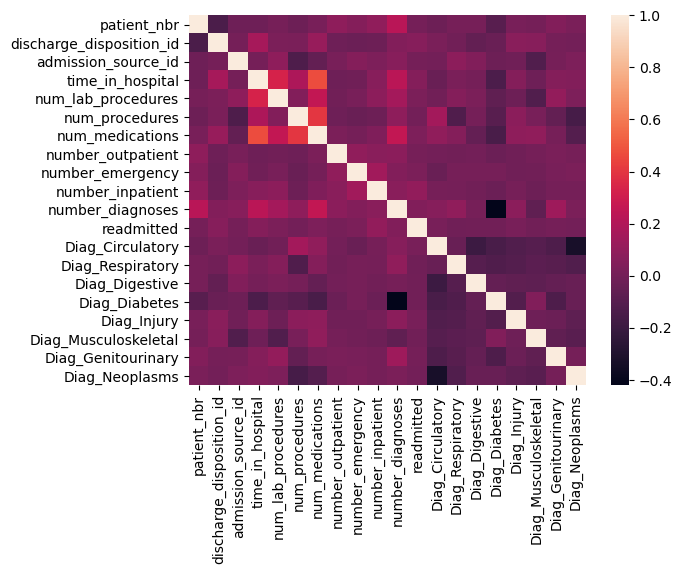

In [22]:
#another style of correlation matrix with seaborn library 
sns.heatmap(diabetes_df.corr())

visualisation_df.groupby('admission_type_id').map(admission_type_id_mapping)

## Graph visualization

In [23]:
#now we can plot some graphs, that will be more interesting with the preprocessing above
race = diabetes_df.groupby('race').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'Race repartition', show_figure=False)
race.xaxis.major_label_orientation = np.pi/4

age = diabetes_df.groupby('age').size().plot_bokeh(kind="bar", title = 'Age repartition',show_figure=False)
age.xaxis.major_label_orientation = np.pi/4

gender = diabetes_df.groupby('gender').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'Gender repartition',show_figure=False)

admissiontypeid = diabetes_df.groupby('admission_type_id').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'Admission_type_id repartition',show_figure=False)

diag1 = diabetes_df.groupby('diag_1').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'diag_1 repartition',show_figure=False)
diag1.xaxis.major_label_orientation = np.pi/4

diag2 = diabetes_df.groupby('diag_2').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'diag_2 repartition',show_figure=False)
diag2.xaxis.major_label_orientation = np.pi/4

diag3 = diabetes_df.groupby('diag_3').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'diag_3 repartition',show_figure=False)
diag3.xaxis.major_label_orientation = np.pi/4



admissiontypeid = visualisation_df.groupby('admission_type_id').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'admission_type_id repartition',show_figure=False)
admissiontypeid.xaxis.major_label_orientation = np.pi/4

repaglinide = diabetes_df.groupby('repaglinide').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'repaglinide repartition',show_figure=False)
repaglinide.xaxis.major_label_orientation = np.pi/4

nateglinide = diabetes_df.groupby('nateglinide').size().sort_values(ascending=False).plot_bokeh(kind="bar", title = 'nateglinide repartition',show_figure=False)
nateglinide.xaxis.major_label_orientation = np.pi/4





grid = gridplot([[race, age, gender], [diag1, diag2, diag3], [admissiontypeid,repaglinide, nateglinide]], plot_width=300, plot_height=300)
show(grid)

Text(0, 0.5, 'Number of patients')

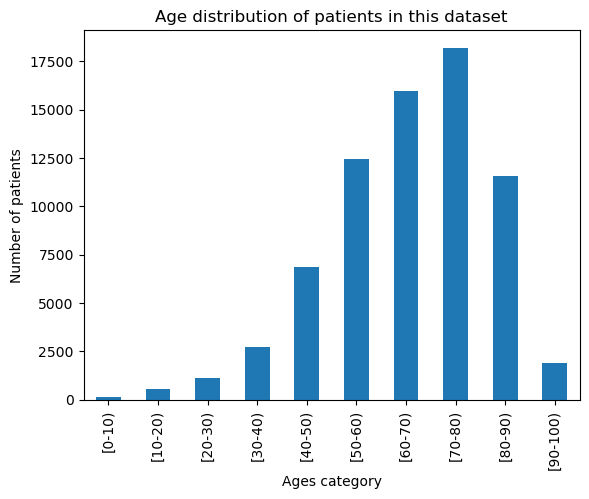

In [24]:
#here we will plot a graph to see tha age distribution of the patients
diabetes_df.groupby('age').size().plot(kind='bar')
plt.title('Age distribution of patients in this dataset')
plt.xlabel('Ages category')
plt.ylabel('Number of patients')
#plt.savefig("Plots\AgeDistribution.png")

Text(0, 0.5, 'Number of patients')

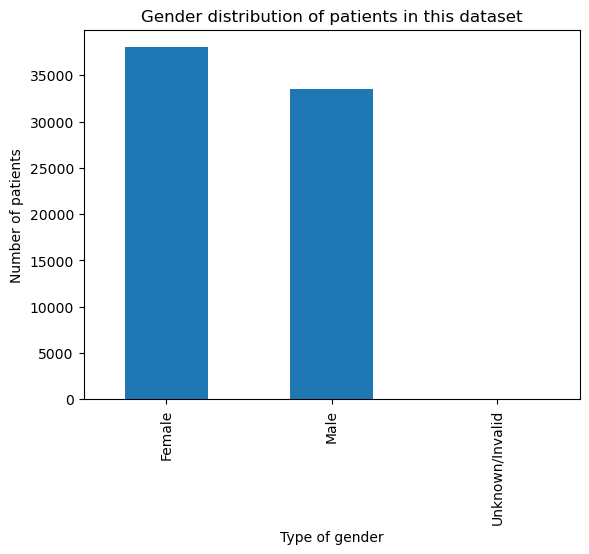

In [25]:
#here we will plot a grpah to see the gender distribution of the patients
diabetes_df.groupby('gender').size().plot(kind='bar')
plt.title('Gender distribution of patients in this dataset')
plt.xlabel('Type of gender')
plt.ylabel('Number of patients')
#plt.savefig("Plots\GenderDistribution.png")

Text(0, 0.5, 'Number of patients')

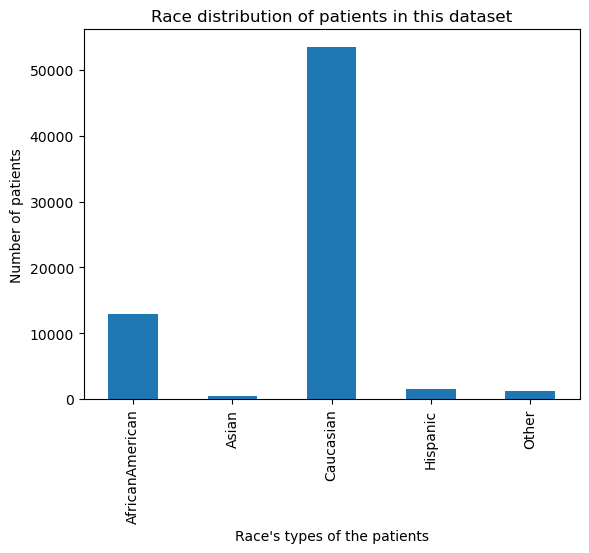

In [26]:
#here we plot a gprah te see the race distribution of the patients 
diabetes_df.groupby('race').size().plot(kind='bar')
plt.title('Race distribution of patients in this dataset')
plt.xlabel("Race's types of the patients")
plt.ylabel('Number of patients')
#plt.savefig("Plots\RaceDistribution.png")

Text(0, 0.5, '')

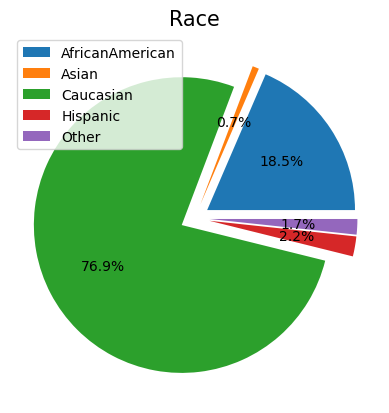

In [27]:
#here we will plot a pie to see the race distribution of the patient with another type of visualization
diabetes_df.groupby('race').size().plot(kind = 'pie',legend = True,labels = None, explode = tuple([0.1 for x in range(5)]), autopct='%1.1f%%')
plt.title('Race', size=15)
plt.ylabel('')

## Machine Learning

In [28]:
#to have real estimation of this dataset, to use some learning models we have to put all
#the differents columns with numerical value, so we will cast them 
#first let's see what column is not with a numerical type 
diabetes_df.info()
#all the columns with other types than numerical type have to be casted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71518 entries, 0 to 71517
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   patient_nbr               71518 non-null  int64 
 1   race                      69570 non-null  object
 2   gender                    71518 non-null  object
 3   age                       71518 non-null  object
 4   admission_type_id         71518 non-null  object
 5   discharge_disposition_id  71518 non-null  int64 
 6   admission_source_id       71518 non-null  int64 
 7   time_in_hospital          71518 non-null  int64 
 8   num_lab_procedures        71518 non-null  int64 
 9   num_procedures            71518 non-null  int64 
 10  num_medications           71518 non-null  int64 
 11  number_outpatient         71518 non-null  int64 
 12  number_emergency          71518 non-null  int64 
 13  number_inpatient          71518 non-null  int64 
 14  diag_1                

In [29]:
#with the method fit_transform from the label encoder library we will change the column values
#this method change to numerical value all by differenciating all values in a column and attribute to these different values one numerical value
label_encoder = LabelEncoder()

diabetes_df["race"] = label_encoder.fit_transform(diabetes_df["race"].astype(str))
diabetes_df["readmitted"] = label_encoder.fit_transform(diabetes_df["readmitted"].astype(str))

for column in diabetes_df.select_dtypes(include=['object']).columns:
    diabetes_df[column] = label_encoder.fit_transform(diabetes_df[column])
    
for column in diabetes_df.select_dtypes(include=['bool']).columns:
    diabetes_df[column] = label_encoder.fit_transform(diabetes_df[column])

In [30]:
#we want now to observe the dataset to see if the transformation has been successful
diabetes_df
#we can see that all the columns have numerical variables that corresponds to their anciant category,
#so the method was successful 

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,diabetesMed,readmitted,Diag_Circulatory,Diag_Respiratory,Diag_Digestive,Diag_Diabetes,Diag_Injury,Diag_Musculoskeletal,Diag_Genitourinary,Diag_Neoplasms
0,8222157,2,0,0,2,25,1,1,41,0,...,0,0,0,0,0,1,0,0,0,0
1,55629189,2,0,1,1,1,7,3,59,0,...,1,0,0,0,0,1,0,0,0,1
2,86047875,0,0,2,1,1,7,2,11,5,...,1,0,0,0,0,1,0,0,0,0
3,82442376,2,1,3,1,1,7,2,44,1,...,1,0,1,0,0,1,0,0,0,1
4,42519267,2,1,4,1,1,7,1,51,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,183087545,2,0,7,1,1,7,9,50,2,...,1,0,0,0,1,1,0,0,0,0
71514,188574944,4,0,4,1,1,7,14,73,6,...,1,0,0,1,0,0,0,0,1,0
71515,140199494,4,0,6,1,1,7,2,46,6,...,1,0,1,0,0,0,1,0,1,0
71516,120975314,2,0,8,1,1,7,5,76,1,...,1,0,0,0,0,0,0,0,0,1


In [31]:
#to evaluate model learning, we need to drop the patient nbr, this column cannot be used for training model
diabetes_df_ml = diabetes_df.drop(columns = ['patient_nbr'])
diabetes_df_ml

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,diabetesMed,readmitted,Diag_Circulatory,Diag_Respiratory,Diag_Digestive,Diag_Diabetes,Diag_Injury,Diag_Musculoskeletal,Diag_Genitourinary,Diag_Neoplasms
0,2,0,0,2,25,1,1,41,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2,0,1,1,1,7,3,59,0,18,...,1,0,0,0,0,1,0,0,0,1
2,0,0,2,1,1,7,2,11,5,13,...,1,0,0,0,0,1,0,0,0,0
3,2,1,3,1,1,7,2,44,1,16,...,1,0,1,0,0,1,0,0,0,1
4,2,1,4,1,1,7,1,51,0,8,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,2,0,7,1,1,7,9,50,2,33,...,1,0,0,0,1,1,0,0,0,0
71514,4,0,4,1,1,7,14,73,6,26,...,1,0,0,1,0,0,0,0,1,0
71515,4,0,6,1,1,7,2,46,6,17,...,1,0,1,0,0,0,1,0,1,0
71516,2,0,8,1,1,7,5,76,1,22,...,1,0,0,0,0,0,0,0,0,1


### Preparation of the data to train and test the futurs models

In [69]:
#we shuffle the data 
diabetes_df_ml = diabetes_df_ml.sample(n = len(diabetes_df_ml), random_state = 42)

In [70]:
#we import train_test_split from the library sklearn to separate our date into 2 groups in order to train our model and later verify the predictions
from sklearn.model_selection import train_test_split

x = diabetes_df_ml.loc[:, diabetes_df_ml.columns != 'readmitted']
y = diabetes_df_ml.loc[:, 'readmitted']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33)

In [71]:
#we scale the data to have a same basis for all the columns 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### K-Nearest Neighbors model

In [74]:
#we import the algo from sklearn library to use knn model and then we create a knn model with our data 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [75]:
score = knn.score(x_train,y_train)
print(score)

0.9151449381221696


In [76]:
#we calculate our prediction 
y_pred = knn.predict(x_test)

In [77]:
#we want now to verify and test the performance of our model
#to do so we will import the confusion matrix and the accuracy method to have visibility on the performance of our model 
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cm,ac

(array([[21342,   135],
        [ 2088,    36]], dtype=int64),
 0.905809075886615)

In [78]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     21477
           1       0.21      0.02      0.03      2124

    accuracy                           0.91     23601
   macro avg       0.56      0.51      0.49     23601
weighted avg       0.85      0.91      0.87     23601



In [79]:
count_0 = 0
count_1 = 1 
for rows in y_pred :
    if rows == 0 : count_0 += 1
    else : count_1 += 1
print(count_0, count_1)

23430 172


In [ ]:
#now it's time to visualize some elements of our model
ks = [x for x in np.arange(10,102, 10)]
acs = []

for k in ks:
    print(k)
    knn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    ac = accuracy_score(y_test,y_pred)
    acs.append(ac)
    
plt.plot(ks,acs,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)

### Linear SVC

In [42]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report 

In [43]:
lsvc  = LinearSVC( dual = False)
print(lsvc)

LinearSVC(dual=False)


In [44]:
lsvc.fit(x_train, y_train)
score = lsvc.score(x_train,y_train)
print(score)

0.9119936556963082


In [45]:
cv_score = cross_val_score(lsvc, x_train, y_train, cv = 10)
print(cv_score.mean())

0.9119519234555332


In [46]:
ypred = lsvc.predict(x_test)
cm = confusion_matrix(y_test, ypred)
print(cm)

[[21522     4]
 [ 2071     4]]


In [47]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     21526
           1       0.50      0.00      0.00      2075

    accuracy                           0.91     23601
   macro avg       0.71      0.50      0.48     23601
weighted avg       0.88      0.91      0.87     23601



## Ensemble Methods

In [80]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit( x_train, y_train)

In [81]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score( clf, x_train, y_train, cv = 5)
scores.mean()

0.9120771588426011

In [82]:
ypred3 = clf.predict(x_test)
ypred3

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, ypred3)
ac = accuracy_score(y_test,ypred3)
cm,ac

(array([[21450,    27],
        [ 2118,     6]], dtype=int64),
 0.9091140205923478)

In [84]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()
clf.fit( x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [85]:
ypred3 = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred3)
ac = accuracy_score(y_test,ypred3)
cm,ac

(array([[19238,  2239],
        [ 1831,   293]], dtype=int64),
 0.8275496800983009)

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()
clf.fit( x_train, y_train)

RandomForestClassifier(random_state=0)

In [92]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : [100, 120, 150],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
grid = GridSearchCV(RandomForestClassifier(), parameters, n_jobs = -1, cv = 5)
grid.fit(x_train,y_train)
print(grid.best_score_, grid.best_estimator_)

KeyboardInterrupt: 

In [87]:
ypred3 = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred3)
ac = accuracy_score(y_test,ypred3)
cm,ac

(array([[21477,     0],
        [ 2124,     0]], dtype=int64),
 0.9100038133977374)

In [91]:
count_0 = 0
count_1 = 1 
for rows in ypred3 :
    if rows == 0 : count_0 += 1
    else : count_1 += 1
print(count_0, count_1)

23560 42


In [88]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, x_train, y_train, cv=5)
scores.mean()
clf.fit( x_train, y_train)

ExtraTreesClassifier(n_estimators=10, random_state=0)

In [89]:
ypred3 = clf.predict(x_test)
cm = confusion_matrix(y_test, ypred3)
ac = accuracy_score(y_test,ypred3)
cm,ac

(array([[21445,    32],
        [ 2115,     9]], dtype=int64),
 0.9090292784204059)